In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [54]:
df = pd.read_csv('car_price_dataset.csv')

In [55]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [56]:
x = df['Mileage']
y = df['Price']

In [57]:
x = df['Mileage'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)

In [58]:
x_scalar = StandardScaler()
y_scalar = StandardScaler()
x_scaled = x_scalar.fit_transform(x)
y_scaled = y_scalar.fit_transform(y)

In [59]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x_scaled)

In [60]:
x_poly_train, x_poly_test, y_train, y_test = train_test_split(x_poly, y_scaled, test_size = 0.2)

In [61]:
reg = linear_model.LinearRegression()
reg.fit(x_poly_train, y_train)

LinearRegression()

In [62]:
y_pred = reg.predict(x_poly_test)

In [63]:
print(reg.coef_)

[[ 0.00000000e+00 -5.71264861e-01 -2.49424924e-02 -2.45854505e-03
  -5.49897476e-04  5.80066196e-03  4.18289834e-03 -6.56438919e-04]]


In [64]:
print(reg.intercept_)

[0.00346627]


In [65]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  0.7148337701209514


In [66]:
R2_score = r2_score(y_test, y_pred)
print("R2 score: ", R2_score)

R2 score:  0.26498870329861457


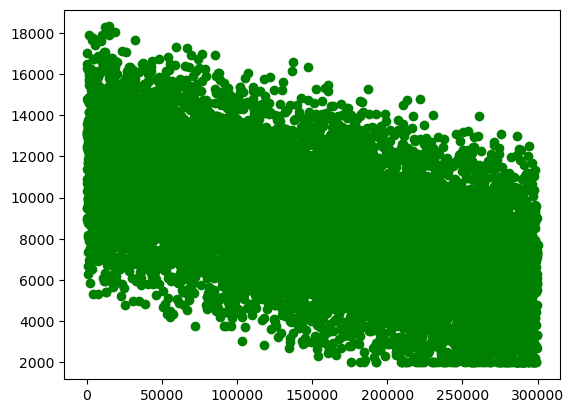

In [67]:
plt.scatter(x,y,color = 'g')
plt.show()

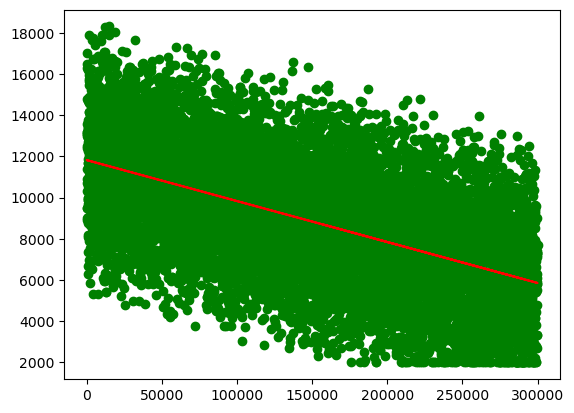

In [68]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x, y)
y_linear_pred = linear_reg.predict(x)


plt.scatter(x, y, color='g')
plt.plot(x, y_linear_pred, color='r')

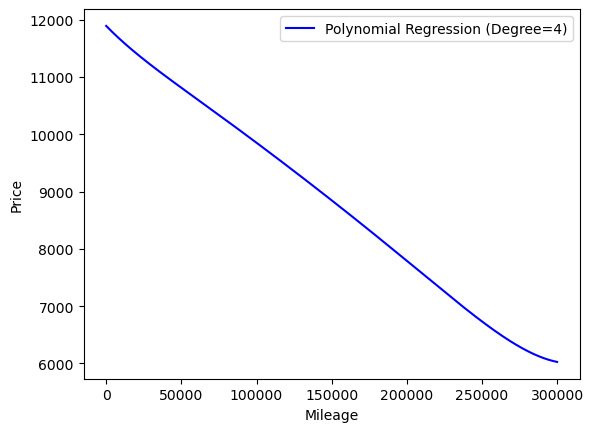

In [69]:
x_sorted = np.sort(x_scaled, axis=0)
x_poly_sorted = poly.transform(x_sorted)
y_poly_pred = reg.predict(x_poly_sorted)
y_poly_pred_rescaled = y_scalar.inverse_transform(y_poly_pred)

plt.plot(x_scalar.inverse_transform(x_sorted), y_poly_pred_rescaled, color='b', label="Polynomial Regression (Degree=4)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend()
plt.show()